In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
cuisines = pd.read_csv('dataset/Cuisines.csv', index_col=0, names=['Cuisine'])
cuisines = cuisines['Cuisine']


In [4]:
recipes = pd.read_csv('dataset/recipes.csv')

# number of recipes and ingredients
NUM_RECIPES = recipes.shape[0]
NUM_INGREDIENTS = recipes.shape[1] - 1 # last column is the cuisine (i.e. class)

recipes.head()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# number recipes for differne cuisines
for i in recipes.cuisine.unique():
    recipes_i =recipes[recipes['cuisine'] == i]

    print('Cuisine '+cuisines[i+1]+'has {} number of recipes'.format(recipes_i.shape[0]))
    

Cuisine Chinesehas 353 number of recipes
Cuisine Englishhas 353 number of recipes
Cuisine Frenchhas 353 number of recipes
Cuisine Germanhas 353 number of recipes
Cuisine Greekhas 353 number of recipes
Cuisine Indianhas 353 number of recipes
Cuisine Italianhas 353 number of recipes
Cuisine Japanesehas 353 number of recipes
Cuisine Mexicanhas 353 number of recipes
Cuisine Moroccanhas 353 number of recipes
Cuisine Spanishhas 353 number of recipes
Cuisine Thaihas 353 number of recipes


In [7]:
#number of occurance for different Ingredient
ingredient_occur = {}
for ingredients in recipes.columns:
    ingredient_occur[ingredients] = recipes[recipes[ingredients] == 1].shape[0]
ingredient_occur = {k: v for k, v in sorted(ingredient_occur.items(), key=lambda item: item[1], reverse =True)}

    #print(ingradients)

In [8]:
ingredient_occur

{'garlic': 2340,
 'onion': 2157,
 "'olive oil'": 1390,
 'salt': 1382,
 'chicken': 1324,
 'pepper': 1147,
 'tomato': 953,
 'water': 894,
 'ginger': 855,
 'butter': 788,
 "'vegetable oil'": 781,
 "'soy sauce'": 719,
 'parsley': 712,
 'cumin': 660,
 'egg': 640,
 'flour': 623,
 'beef': 610,
 'broth': 610,
 'sugar': 574,
 'wine': 569,
 "'green onion'": 545,
 "'sweet pepper'": 543,
 'carrot': 510,
 'cilantro': 477,
 'oregano': 413,
 "'lemon juice'": 410,
 'mushroom': 399,
 'potato': 394,
 "'chile pepper'": 387,
 'cinnamon': 375,
 'paprika': 372,
 'cuisine': 353,
 'pork': 344,
 'lemon': 339,
 "'bay leaf'": 335,
 'turmeric': 332,
 'coriander': 328,
 'thyme': 318,
 'basil': 308,
 'cornstarch': 306,
 'rice': 295,
 'pasta': 285,
 "'parmesan cheese'": 280,
 "'cayenne pepper'": 265,
 "'tomato paste'": 254,
 "'chicken stock'": 244,
 'lime': 243,
 "'sesame oil'": 242,
 'shrimp': 234,
 "'brown sugar'": 233,
 'celery': 228,
 "'chili powder'": 227,
 'milk': 227,
 'honey': 223,
 'sausage': 217,
 "'red pe

In [25]:
# number of ingredients per recipes for different cuisines
mean = []
for i in recipes.cuisine.unique():
    recipes_i =recipes[recipes['cuisine'] == i]
    recipes_i = recipes_i.drop(['cuisine'],axis=1)
    num_ingredients =  recipes_i.sum(axis=1)
    mean.append(num_ingredients.mean())
    print('Cuisine '+cuisines[i+1]+'the median number, mean_number , std of ingredients per recipes are {:.3}   {:.3}   {:.3}'\
          .format(num_ingredients.median(),num_ingredients.mean(),num_ingredients.std()))
    

Cuisine Chinesethe median number, mean_number , std of ingredients per recipes are 11.0   11.4   3.18
Cuisine Englishthe median number, mean_number , std of ingredients per recipes are 9.0   9.3   3.3
Cuisine Frenchthe median number, mean_number , std of ingredients per recipes are 10.0   10.5   3.61
Cuisine Germanthe median number, mean_number , std of ingredients per recipes are 9.0   9.53   3.48
Cuisine Greekthe median number, mean_number , std of ingredients per recipes are 10.0   10.8   3.56
Cuisine Indianthe median number, mean_number , std of ingredients per recipes are 13.0   12.8   3.26
Cuisine Italianthe median number, mean_number , std of ingredients per recipes are 10.0   10.4   3.74
Cuisine Japanesethe median number, mean_number , std of ingredients per recipes are 8.0   8.98   3.34
Cuisine Mexicanthe median number, mean_number , std of ingredients per recipes are 10.0   10.2   3.43
Cuisine Moroccanthe median number, mean_number , std of ingredients per recipes are 13.0   

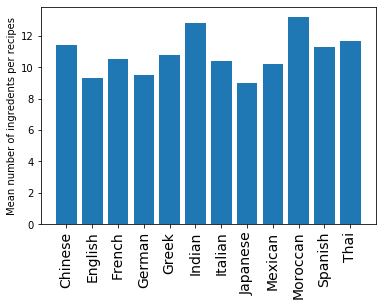

In [27]:
# bar plot
labels = list(cuisines.values)
x = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
ax.bar(x,mean,width)
ax.set_ylabel('Mean number of ingredents per recipes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                tick.label.set_rotation('vertical')

In [13]:
# number of ingredients occureed in  different cuisines:
ingre_num = []
for i in recipes.cuisine.unique():
    recipes_i =recipes[recipes['cuisine'] == i]
    recipes_i = recipes_i.drop(['cuisine'],axis=1)
    num_ingredients =  recipes_i.sum(axis=0)
    num = num_ingredients[num_ingredients !=0].shape[0]
    ingre_num.append(num)
    print('Cuisine '+cuisines[i+1]+'occures {} of ingredients'.format(num))

Cuisine Chineseoccures 240 of ingredients
Cuisine Englishoccures 317 of ingredients
Cuisine Frenchoccures 292 of ingredients
Cuisine Germanoccures 263 of ingredients
Cuisine Greekoccures 260 of ingredients
Cuisine Indianoccures 235 of ingredients
Cuisine Italianoccures 249 of ingredients
Cuisine Japaneseoccures 286 of ingredients
Cuisine Mexicanoccures 250 of ingredients
Cuisine Moroccanoccures 254 of ingredients
Cuisine Spanishoccures 277 of ingredients
Cuisine Thaioccures 260 of ingredients


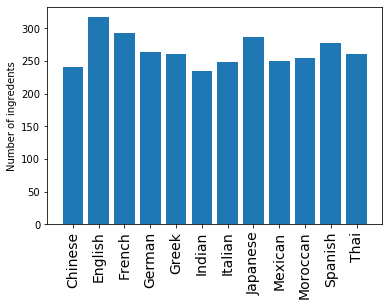

In [29]:
# bar plot
labels = list(cuisines.values)
x = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
ax.bar(x,ingre_num,width)
ax.set_ylabel('Number of ingredents')
ax.set_xticks(x)
ax.set_xticklabels(labels)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                tick.label.set_rotation('vertical')
